In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv(r'C:\Users\Lenovo\Desktop\Projects\Projects_Data\Analysis_project\analysis_with_python\diwali_sale\Diwali Sales Data.csv',encoding='unicode_escape')

In [3]:
df.head(5)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [4]:
df.shape

(11251, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [7]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [8]:
df.dropna(inplace=True)  # drop null values

In [9]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [10]:
# change data type of amount float into int 

df['Amount'] = df['Amount'].astype('int')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11239 non-null  int64 
 1   Cust_name         11239 non-null  object
 2   Product_ID        11239 non-null  object
 3   Gender            11239 non-null  object
 4   Age Group         11239 non-null  object
 5   Age               11239 non-null  int64 
 6   Marital_Status    11239 non-null  int64 
 7   State             11239 non-null  object
 8   Zone              11239 non-null  object
 9   Occupation        11239 non-null  object
 10  Product_Category  11239 non-null  object
 11  Orders            11239 non-null  int64 
 12  Amount            11239 non-null  int32 
dtypes: int32(1), int64(4), object(8)
memory usage: 1.2+ MB


# Exploratory Data Analysis

## Gender

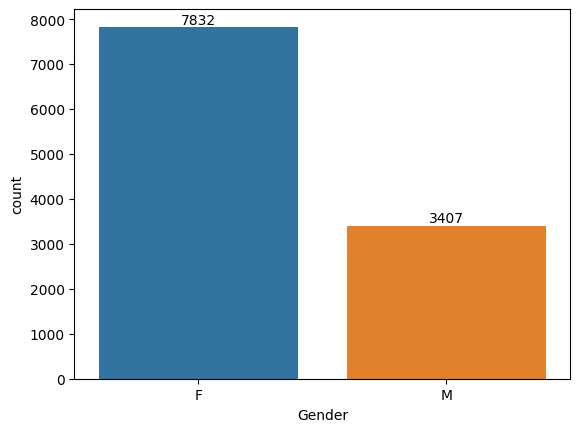

In [12]:
# plotting a bar chart for gender and its count 

ax = sns.countplot( x = 'Gender',  data=df,hue='Gender')

for bars in ax.containers:
    ax.bar_label(bars)

  Gender    Amount
0      F  74335853
1      M  31913276


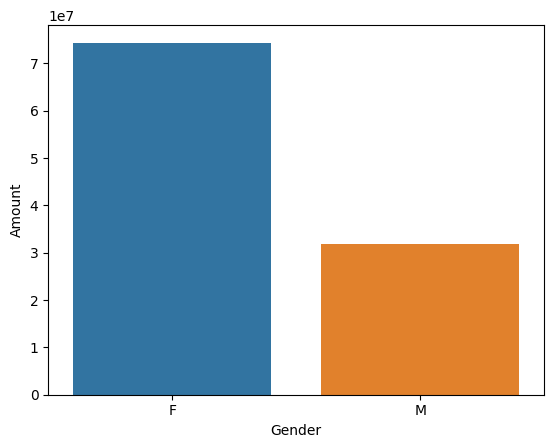

In [13]:
# plotting a bar chart for gender vs total amount count

sale_gender = df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
print(sale_gender)

sns.barplot(x='Gender', y= 'Amount', data=sale_gender,hue='Gender')
plt.show()

*From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men*

# Age

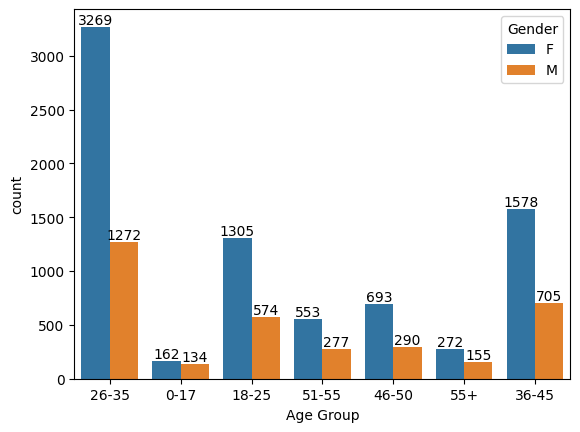

In [14]:
ax = sns.countplot(x='Age Group',data=df,hue='Gender')

for bars in ax.containers:
    ax.bar_label(bars)

  Age Group    Amount
2     26-35  42613442
3     36-45  22144994
1     18-25  17240732
4     46-50   9207844
5     51-55   8261477
6       55+   4080987
0      0-17   2699653


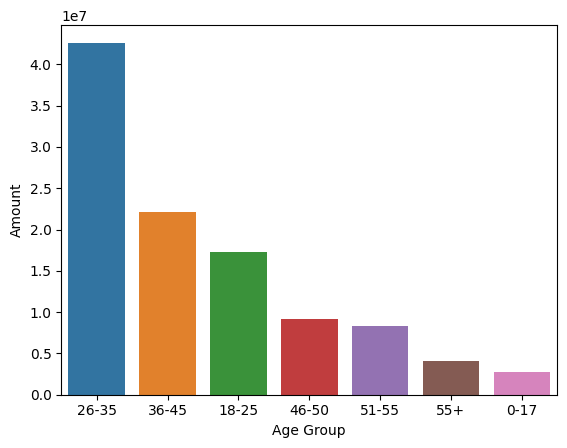

In [15]:
# Total amount with age group

sales_age = df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
print(sales_age)

sns.barplot(x='Age Group',y='Amount',data = sales_age,hue='Age Group')
plt.show()

*From above graphs we can see that most of the buyers are of age group between 26-35 yrs female*

# State

In [16]:
df.head(1)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952


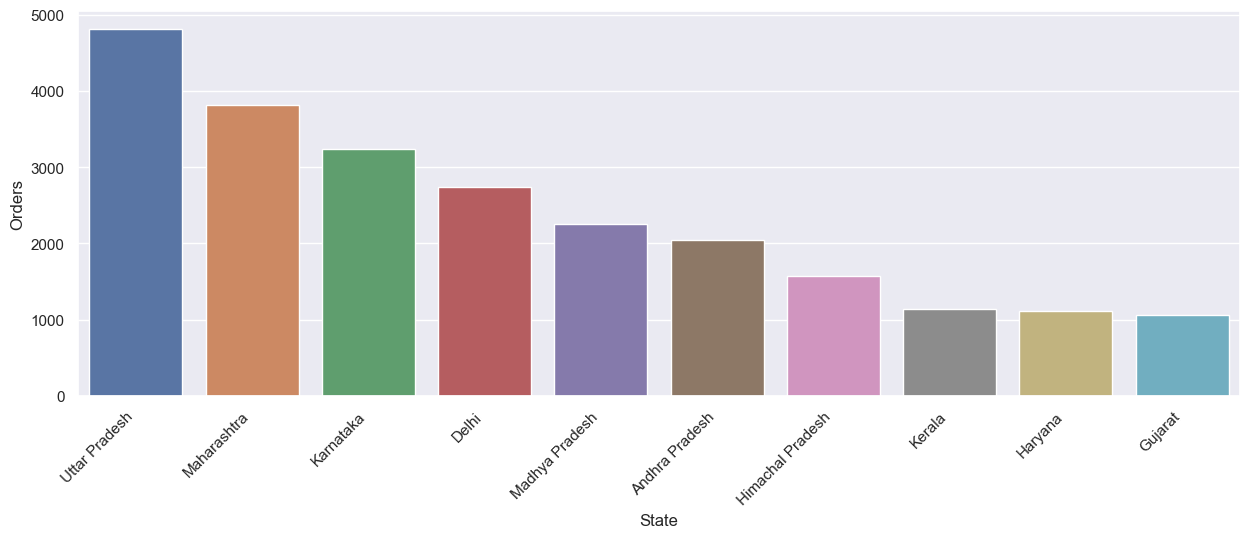

In [17]:
# Total number of Order from Top 10 State

sales_state = df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by="Orders",ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x="State",y='Orders',data=sales_state,hue='State')
plt.xticks(rotation=45,ha='right')
plt.show()

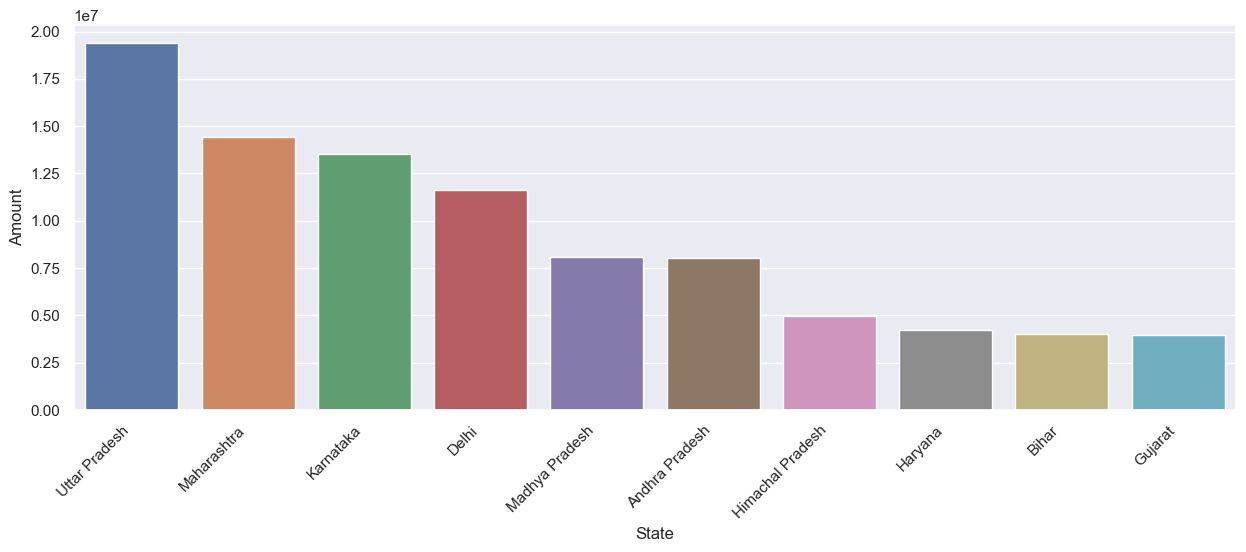

In [18]:
# Total Amount/Sales from Top 5 States

state_amount = df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x='State',y='Amount',data=state_amount,hue='State')
plt.xticks(rotation=45,ha='right')
plt.show()

*From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively*

# Marital Status

In [19]:
df.head(1)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952


In [20]:
marital_status_mapping = {0:'Married',1:'Unmarried'}

In [21]:
df['Marital_Status'] = df['Marital_Status'].map(marital_status_mapping)

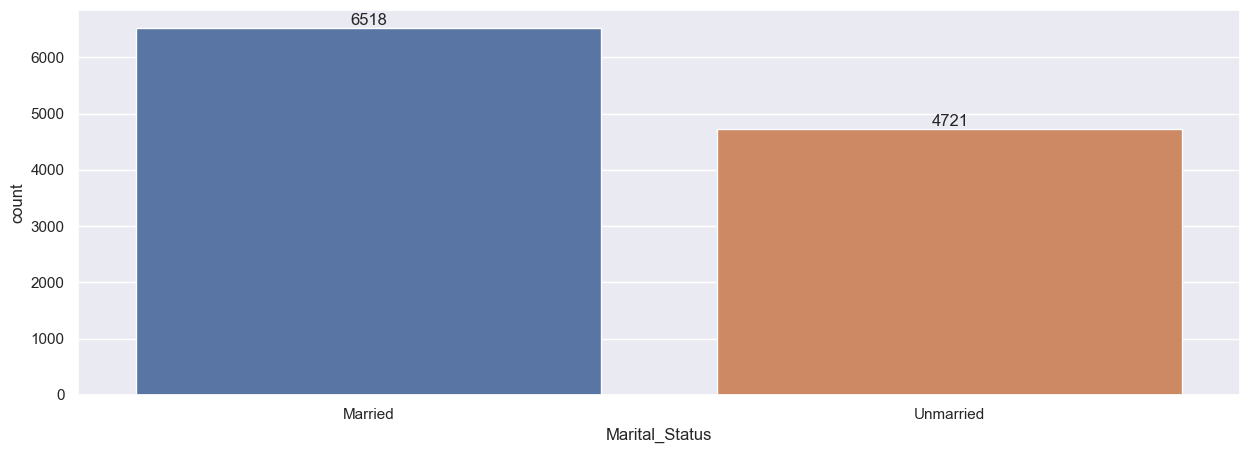

In [22]:
# plotting a bar chart for Martial status and its counts

ax = sns.countplot(x="Marital_Status",data=df,hue='Marital_Status')

sns.set(rc={'figure.figsize':(15,5)})
for bars in ax.containers:
    ax.bar_label(bars)

*Married individuals are the highest buyers among all marital statuses.*
*0 is represent Married status.*
*1 is represent Unmarried status.*

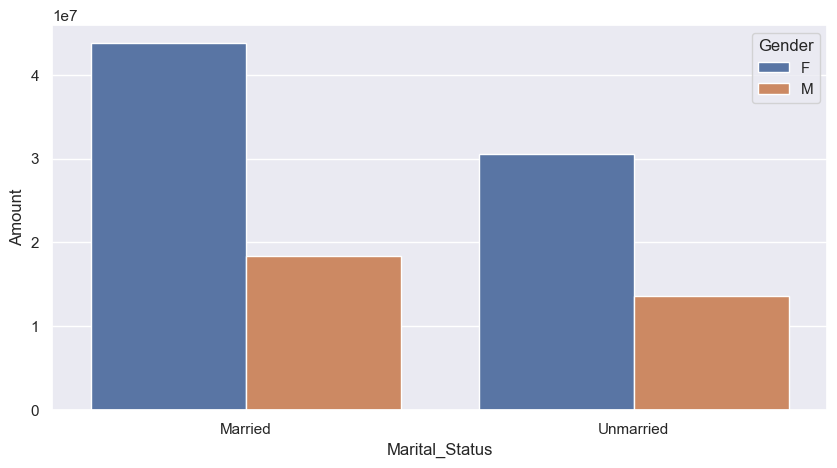

In [23]:
# plotting a bar chart for Martial status and gender based on the number of Amount

sales_state = df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x='Marital_Status',y='Amount',data=sales_state,hue='Gender')
plt.show()

*From above graphs we can see that most of the buyers are married (women) and they have high purchasing power*

# Occupation

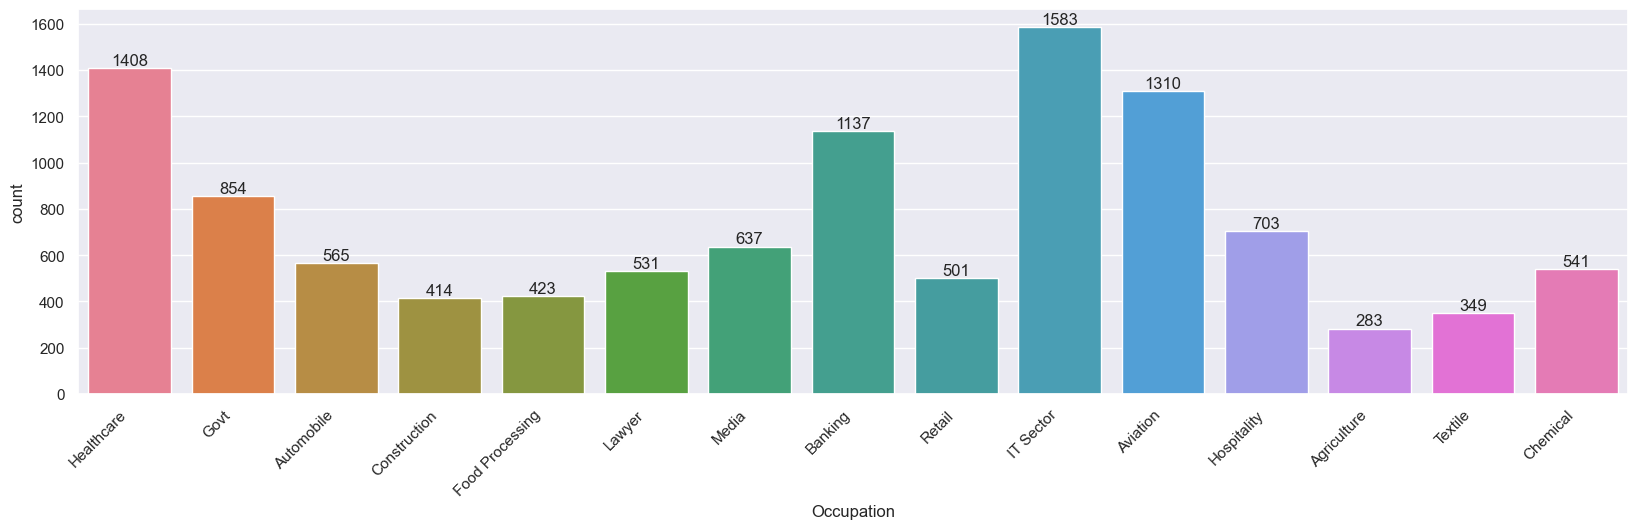

In [24]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(x='Occupation',data=df,hue='Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

plt.xticks(rotation=45,ha='right')
plt.show()

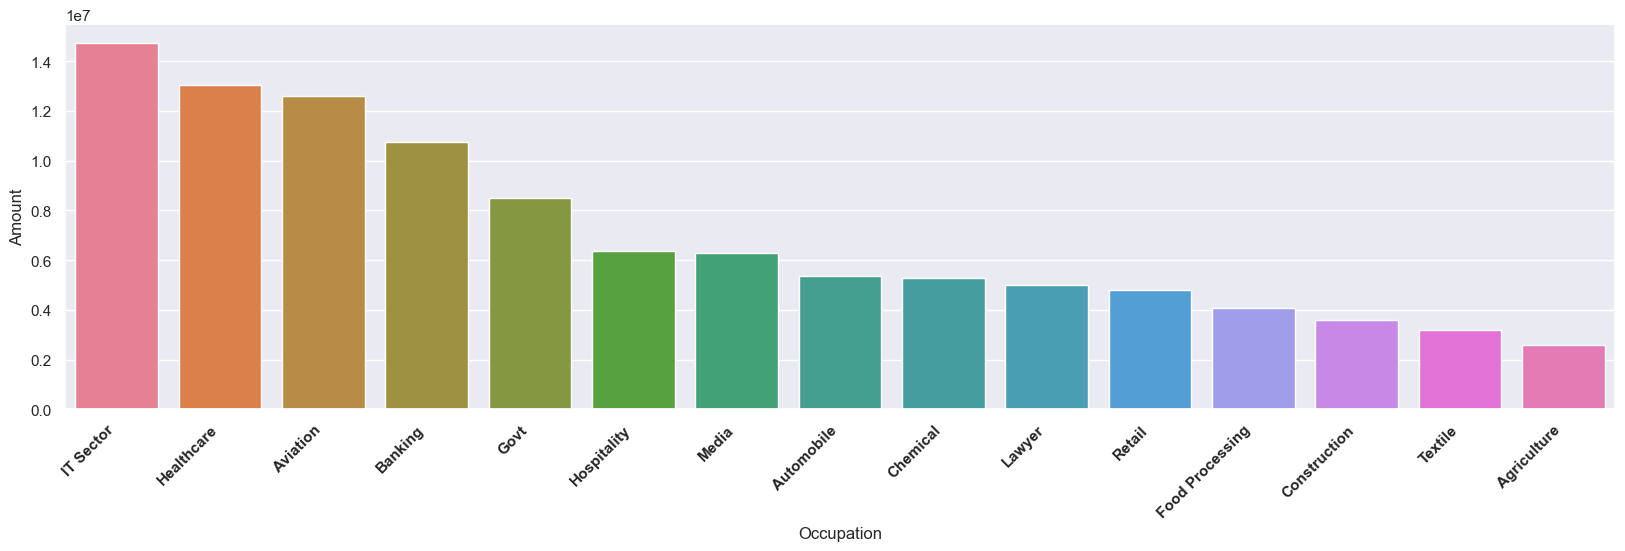

In [25]:
sales_occupations = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.barplot(x='Occupation',y='Amount',data=sales_occupations,hue='Occupation')
plt.xticks(rotation=45,ha='right',fontweight='bold')
plt.show()

*From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector*

# Product Category

In [26]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

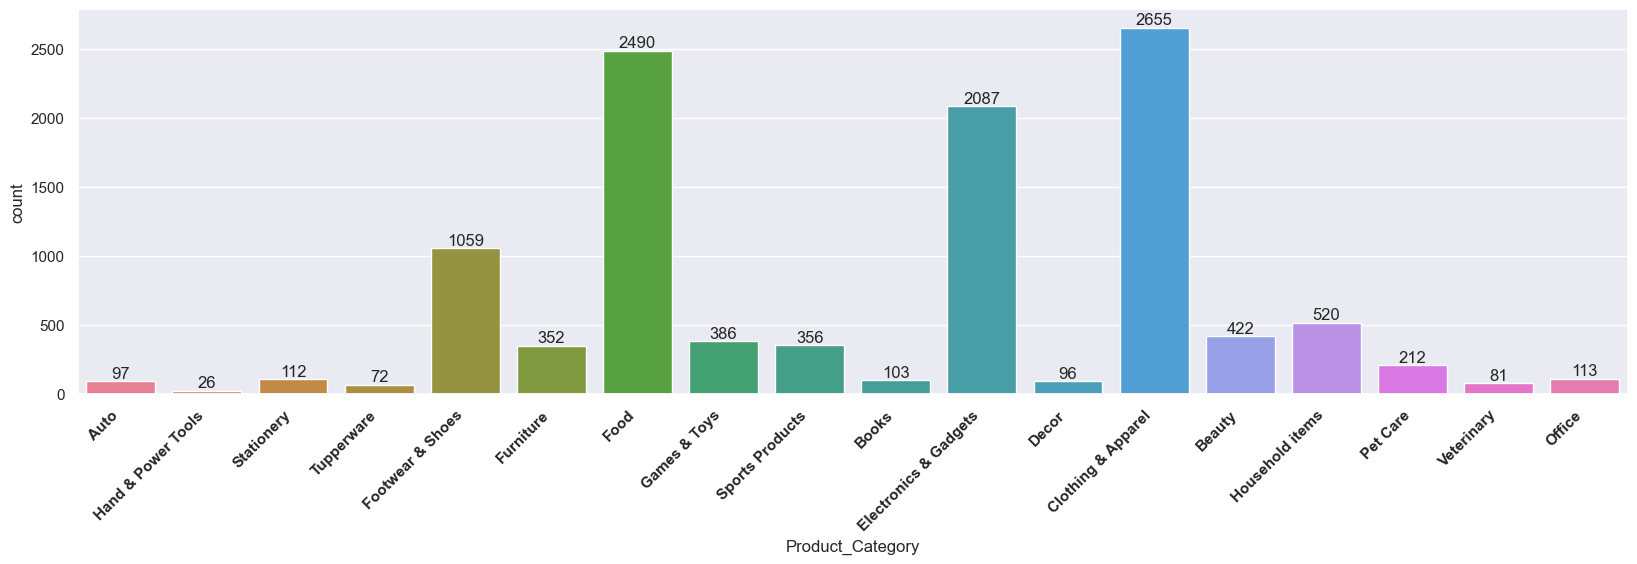

In [27]:
ax = sns.countplot(data=df,x='Product_Category',hue='Product_Category')
for bars in ax.containers:
    ax.bar_label(bars)
plt.xticks(rotation=45,ha='right',fontweight='bold')
plt.show()

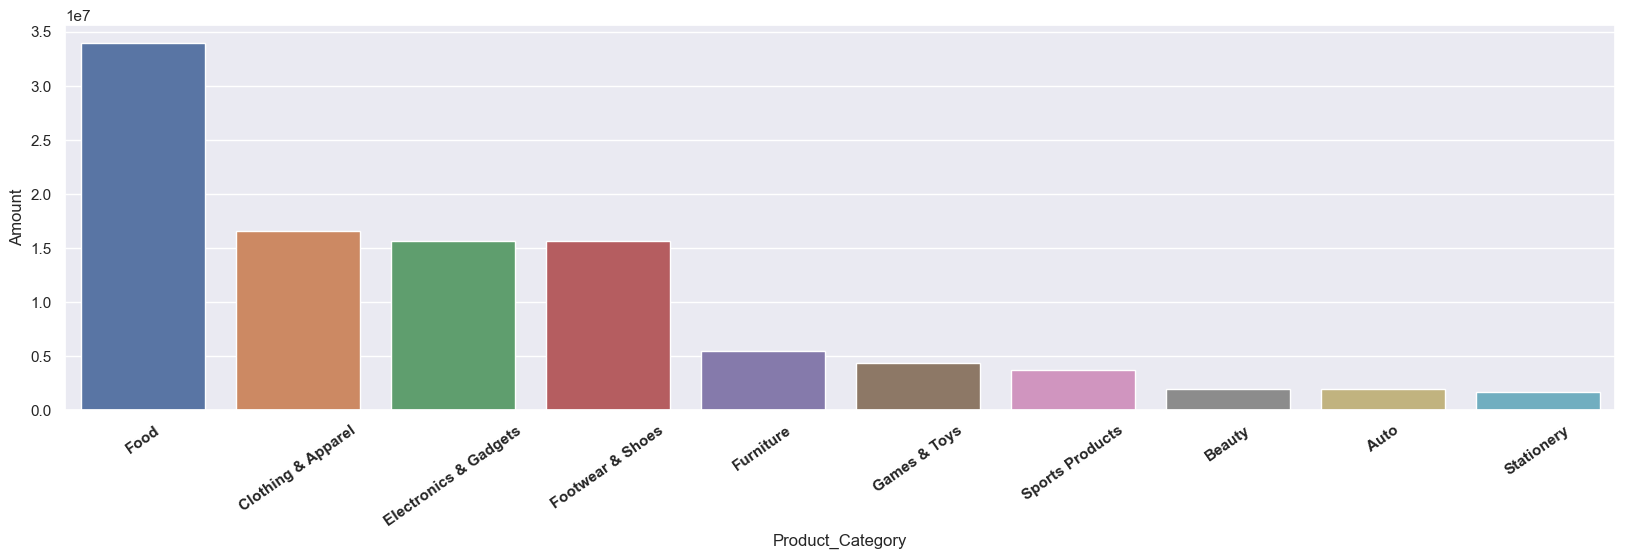

In [28]:
sales_product = df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)

sns.barplot(x='Product_Category',y='Amount',data=sales_product,hue='Product_Category')
plt.xticks(fontweight='bold',rotation=35)
plt.show()

*From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category*

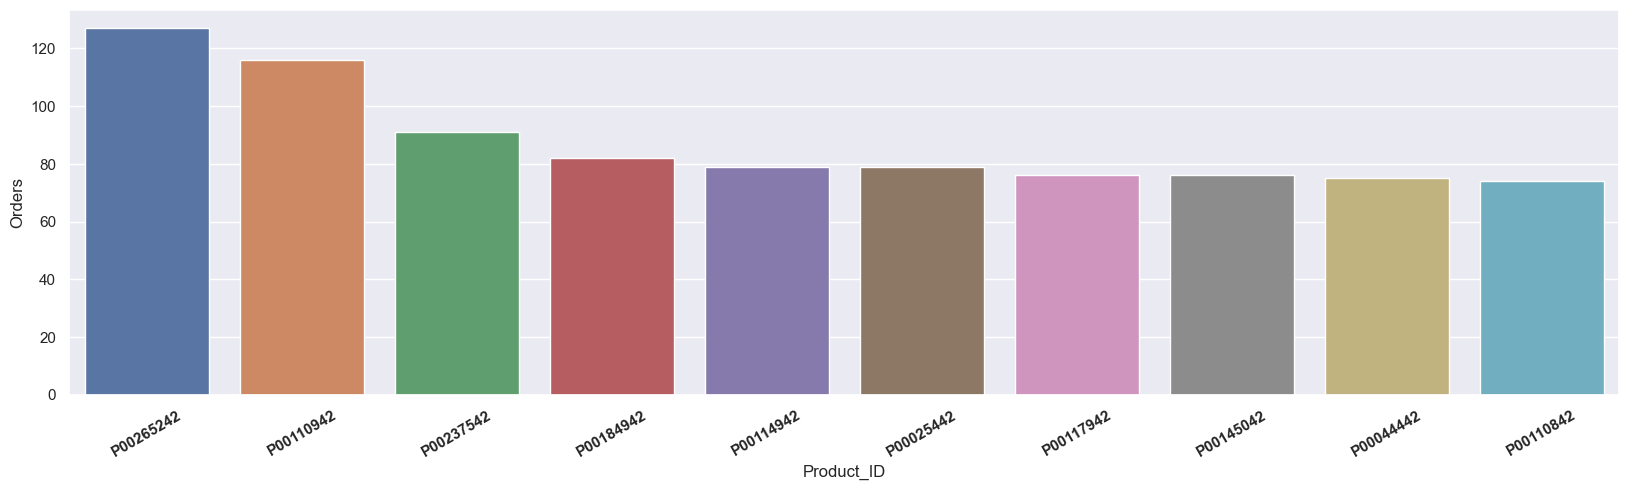

In [29]:
sales_orders = df.groupby(['Product_ID'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)

sns.barplot(x='Product_ID',y='Orders',data=sales_orders,hue='Product_ID')
plt.xticks(fontweight='bold',rotation=30)
plt.show()

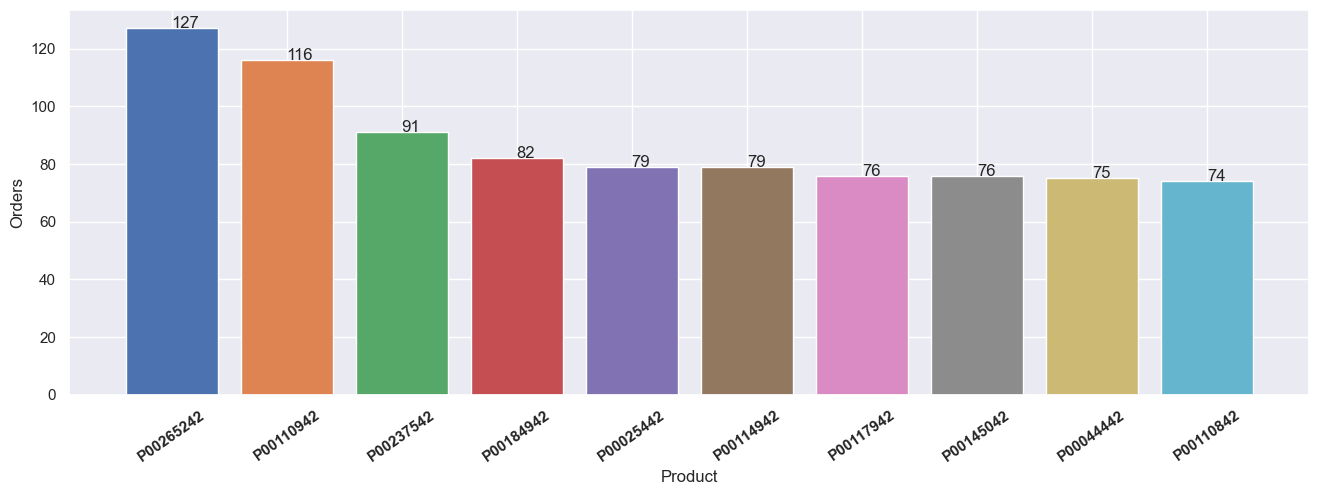

In [30]:
# top 10 most sold products (same thing as above)

top_products = df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(16,5))

for product_id in top_products.index:
    ax.bar(x=product_id, height=top_products[product_id])
    ax.annotate(str(top_products[product_id]), xy=(product_id, top_products[product_id]))

ax.set_xlabel('Product')
ax.set_ylabel('Orders')
ax.set_label('Top 10 SOLD PRODUCTS')
plt.xticks(fontweight='bold',rotation=35)
plt.show()

## Conclusion:


*Married women age group 26-35 yrs from UP,  Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category*